In [87]:
import numpy as np

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [88]:
from keras.datasets import imdb
import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [89]:
X_train[0:10]

array([list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188

Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [90]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [91]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [92]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [93]:
print(f'X_train data type: {X_train.dtype}\n X_train shape: {X_train.shape}\n')

print(f'X_test data type: {X_test.dtype}\n X_test shape: {X_test.shape}\n')

print(f'y_train data type: {y_train.dtype}\n y_train shape: {y_train.shape}\n')

print(f'y_test data type: {y_test.dtype}\n y_test shape: {y_test.shape}\n')


X_train data type: float64
 X_train shape: (25000, 10000)

X_test data type: float64
 X_test shape: (25000, 10000)

y_train data type: float32
 y_train shape: (25000,)

y_test data type: float32
 y_test shape: (25000,)



In [94]:
X_train.shape[1]

10000

Maak een neuraal netwerk dat met deze data overweg kan.

In [95]:
from keras.models import Sequential
from keras.layers import Dense

model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [96]:
from keras.optimizers import Adam
""""De categorical_crossentropy loss functie is gebaseerd op de Kullback-Leibler divergentie tussen de werkelijke kansverdeling van de classes en de voorspelde kansverdeling van het model. De loss functie meet dus de afstand tussen de werkelijke en voorspelde kansverdelingen en probeert deze afstand te minimaliseren tijdens het trainen van het model.

Binaire cross-entropie is een maat voor de ongelijkheid tussen twee kansverdelingen, in dit geval de voorspelde kansverdeling en de werkelijke kansverdeling. Het berekent het verschil tussen de voorspelde en werkelijke kansen van de binaire uitvoerklasse. Door het binaire cross-entropieverlies te minimaliseren, kan het neurale netwerkmodel leren om betere voorspellingen te doen.

het model is gecompileerd met de verliesfunctie 'binary_crossentropy', die geschikt is voor binaire classificatieproblemen. Dit betekent dat het model zal proberen de binaire kruis-entropie tussen de voorspelde en echte klassen te minimaliseren.

"""
#compiled het model samen met de Adam-optimizer, een leersnelheid van 0,01,
model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()
history = model.fit(X_train, y_train, epochs=4, batch_size=5)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                160016    
                                                                 
 dense_67 (Dense)            (None, 16)                272       
                                                                 
 dense_68 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
5000/5000 [==============================] - 5s 1ms/step - loss: 0.3313 - accuracy: 0.8611
Epoch 2/4
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2047 - accuracy: 0.9156
Epoch 3/4
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1518 - accuracy: 0.9363
Epoch 4/

Split in train en validatieset

In [97]:
from sklearn.model_selection import train_test_split
# train_test_split function splits de training data in twee delen:
# een kleine training set en een validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Train je model model met de gemaakte train- en validatieset. 

In [98]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

#model = Sequential()
#model.add(Dense(units=16, activation='relu', input_shape=(10000,)))
#model.add(Dense(units=32, activation='relu'))
#model.add(Dense(units=y_train.shape[0], activation='sigmoid'))


#model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])

#model.summary()
#voeg lagen toe met model.add()
#voeg lagen toe met model.add()


Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0644 - accuracy: 0.9717 - val_loss: 0.0548 - val_accuracy: 0.9746
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0407 - accuracy: 0.9811 - val_loss: 0.0591 - val_accuracy: 0.9714
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0334 - accuracy: 0.9836 - val_loss: 0.0660 - val_accuracy: 0.9722
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0291 - accuracy: 0.9852 - val_loss: 0.0658 - val_accuracy: 0.9730
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9855 - val_loss: 0.0815 - val_accuracy: 0.9720
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9852 - val_loss: 0.1928 - val_accuracy: 0.9540
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0474 - accuracy: 0.9802 - val_loss: 0.0818 - val_accuracy: 0.9634
Epoch 

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

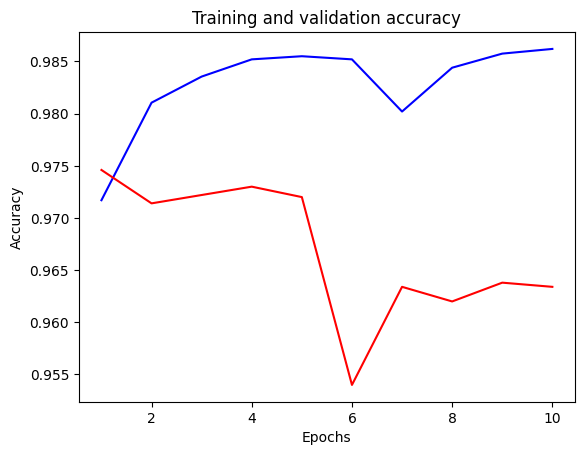

'"import matplotlib.pyplot as plt\nimport numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Embedding, LSTM\nfrom tensorflow.keras.optimizers import Adam\n\n# define the model architecture\nmodel = Sequential()\nmodel.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))\nmodel.add(LSTM(32))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\n# compile the model with binary cross-entropy loss and Adam optimizer\nmodel.compile(loss=\'binary_crossentropy\', optimizer=Adam(lr=0.001), metrics=[\'accuracy\'])\n\n\n# train the model and save the training and validation accuracy for each epoch\nhistory = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1)\n\n\nplt.plot(history.history[\'accuracy\'])\nplt.plot(history.history[\'val_accuracy\'])\nplt.title(\'Learning Curve\')\nplt.ylabel(\'Accuracy\')\nplt.xlabel(\'Epoch\')\nplt.legend([\'Training\', \'Validation\'], loc=\'upper left\')\nplt.show()'

In [99]:
# Haalt de training accuracy values op uit het history en slaat ze op in train_acc
train_acc = history.history['accuracy']
# Haalt de validation accuracy values op uit het history en sla ze op in val_acc
val_acc = history.history['val_accuracy']
# Maakt een range dat loopt van 1 tot de lengte van train_acc + 1. Dit wordt gebruikt als de x-as waarden voor de plot.
# + 1 voor final epoch.
epochs = range(1, len(train_acc) + 1)

#plot de Training acc
plt.plot(epochs, train_acc, 'b', label='Training acc')
#plot de Validation acc
plt.plot(epochs, val_acc, 'r', label='Validation acc')

# titel
plt.title('Training and validation accuracy')

# x as labels
plt.xlabel('Epochs')

# y as labels
plt.ylabel('Accuracy')

# Display the plot
plt.show()

""""import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam

# define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


# train the model and save the training and validation accuracy for each epoch
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()"""

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

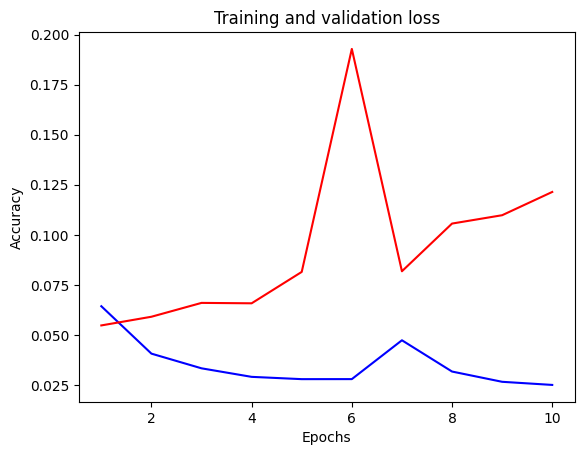

In [100]:
# Haalt de training loss values op uit het history en slaat ze op in train_loss
train_acc = history.history['loss']
# Haalt de validation loss values op uit het history en sla ze op in val_loss
val_acc = history.history['val_loss']
# Maakt een range dat loopt van 1 tot de lengte van train_loss + 1. Dit wordt gebruikt als de x-as waarden voor de plot.
# + 1 voor final epoch.
epochs = range(1, len(train_acc) + 1)

#plot de Training loss
plt.plot(epochs, train_acc, 'b', label='Training loss')
#plot de Validation loss
plt.plot(epochs, val_acc, 'r', label='Validation loss')

# titel
plt.title('Training and validation loss')

# x as labels
plt.xlabel('Epochs')

# y as labels
plt.ylabel('Accuracy')

# Display the plot
plt.show()

Test je model

In [101]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(test_accuracy)

782/782 [==============================] - 1s 2ms/step - loss: 1.6513 - accuracy: 0.8586
0.8585600256919861


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

In [104]:
# Creates a sequential model
model2 = models.Sequential()

# dense layer en zegt hoe de input shape is voor de first layer
model2.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# dense layer
model2.add(Dense(16, activation='relu'))

# output layer
# activation function is softmax in plaats van sigmoid
model2.add(Dense(1, activation='softmax'))

# Compiles the model with the Adam optimizer, a learning rate of 0.01,
# and binary crossentropy loss (binary classification)
model2.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Traint het model op de trainingsgegevens, met behulp van 5 epochs
# het model evalueert ook na elk epoch op de testgegevens
history2 = model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
625/625 [==============================] - 2s 2ms/step - loss: 0.3311 - accuracy: 0.4992
Epoch 2/5
625/625 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.4992
Epoch 3/5
625/625 [==============================] - 1s 2ms/step - loss: 0.1067 - accuracy: 0.4992
Epoch 4/5
625/625 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.4992
Epoch 5/5
625/625 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.4992


Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?